In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Todo

### Slå ihop 2016, 2017, 2018, 2019 och 2020
    #### Ta bort oanvända frågor CHECK
    #### Ge kollumnerna bra namn CHECK
    #### Mappa kolumnnamnen till frågor CHECK
    #### Preprocessa allt ordentligt se GH/kaggle
### Modellering
    #### Testa logistisk regression CHECK
    #### Eventuellt testa annan modell
### Analys & resultat & visualisering
    #### Se vilka variabler som är viktiga
    #### Se hur modellen presterar
    #### Jämför olika modeller

In [241]:
answers = pd.read_csv('./data/Answer.csv')
survey_2020 = pd.read_csv('./data/2020-survey.csv')

chosen_features = [1, 2, 5, 6, 7, 8, 9, 13, 17, 18, 19]

### Formating 2020 survey
Filtering out removed questions and adding year column.

In [242]:
unused_questions_removed = survey_2020.columns[survey_2020.columns.str.startswith('q')]
survey_2020 = survey_2020[unused_questions_removed]
survey_2020 = survey_2020[['q1', 'q2', 'q5', 'q6', 'q7', 'q8', 'q9', 'q13', 'q17', 'q18', 'q19']]
survey_2020['Year'] = '2020'
survey_2020

,q1,q2,q5,q6,q7,q8,q9,q13,q17,q18,q19,Year
0,45,Male,1,Yes,0,NaN,NaN,NaN,NaN,NaN,NaN,2020
1,24,female,1,Yes,1,NaN,NaN,NaN,NaN,NaN,NaN,2020
2,46,Male,1,Yes,0,NaN,NaN,NaN,NaN,NaN,NaN,2020
3,25,Female,1,Yes,0,NaN,NaN,NaN,NaN,NaN,NaN,2020
4,25,F,1,I don't know,0,NaN,NaN,NaN,NaN,NaN,NaN,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
175,53,Male,0,No,0,More than 1000,0.0,1.0,Somewhat difficult,No,No,2020
176,23,F,0,No,0,26-100,1.0,1.0,Very easy,Maybe,Maybe,2020
177,34,Male,0,Yes,1,100-500,1.0,1.0,Somewhat easy,Maybe,Maybe,2020
178,43,Male,0,Yes,1,500-1000,0.0,1.0,Difficult,Maybe,No,2020


## Filter out removed questions

In [243]:
answers = answers[answers['QuestionID'].isin(chosen_features)]

## Create survey DataFrame

We want a data frame where each row will represent one users answers to one survey. We create a empty DataFrame and fill it out with one row for each unique UserID found in the answers table.

In [244]:
surveys = pd.DataFrame(columns=['q1', 'q2', 'q5', 'q6', 'q7', 'q8', 'q9', 'q13', 'q17', 'q18', 'q19', 'Year'])
user_ids = answers['UserID'].unique()
surveys['UserID'] = user_ids
surveys

,q1,q2,q5,q6,q7,q8,q9,q13,q17,q18,q19,Year,UserID
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4214
4214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4215
4215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4216
4216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4217


In order to fill out the survey DataFrame we have to iterate through each row in the answers table and set the values in the corresponding row in surveys.

In [245]:
for answer in answers.iterrows():
    user_id = answer[1][2]
    question_id = 'q' + str(answer[1][3])
    answer_text = answer[1][0]
    year = answer[1][1]
    surveys.at[user_id - 1, question_id] = answer_text
    surveys.at[user_id - 1, 'Year'] = year
    
    

### Removing 2014 survey
The 2014 study does not contain some questions about communication

In [246]:
surveys = surveys[surveys['Year'] != 2014]
surveys

,q1,q2,q5,q6,q7,q8,q9,q13,q17,q18,q19,Year,UserID
1260,39,Male,0,No,0,26-100,1,-1,Very easy,Maybe,Yes,2016,1261
1261,29,Male,0,Yes,1,6-25,1,-1,Somewhat easy,Maybe,Yes,2016,1262
1262,38,Male,0,No,1,6-25,1,-1,Neither easy nor difficult,Maybe,Maybe,2016,1263
1263,43,Male,1,No,1,-1,-1,-1,-1,-1,-1,2016,1264
1264,43,Female,0,Yes,1,6-25,0,1,Neither easy nor difficult,Maybe,No,2016,1265
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4213,27,male,0,No,0,More than 1000,0,1,Somewhat difficult,No,No,2019,4214
4214,48,Male,1,No,0,-1,-1,-1,-1,-1,-1,2019,4215
4215,50,Male,1,No,0,-1,-1,-1,-1,-1,-1,2019,4216
4216,30,female,0,No,0,More than 1000,1,1,Difficult,Maybe,No,2019,4217


### Concat 2020 study to the surveys DataFrame

In [247]:
surveys = pd.concat([surveys, survey_2020])
surveys

,q1,q2,q5,q6,q7,q8,q9,q13,q17,q18,q19,Year,UserID
1260,39,Male,0,No,0,26-100,1,-1,Very easy,Maybe,Yes,2016,1261.0
1261,29,Male,0,Yes,1,6-25,1,-1,Somewhat easy,Maybe,Yes,2016,1262.0
1262,38,Male,0,No,1,6-25,1,-1,Neither easy nor difficult,Maybe,Maybe,2016,1263.0
1263,43,Male,1,No,1,-1,-1,-1,-1,-1,-1,2016,1264.0
1264,43,Female,0,Yes,1,6-25,0,1,Neither easy nor difficult,Maybe,No,2016,1265.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,53,Male,0,No,0,More than 1000,0.0,1.0,Somewhat difficult,No,No,2020,NaN
176,23,F,0,No,0,26-100,1.0,1.0,Very easy,Maybe,Maybe,2020,NaN
177,34,Male,0,Yes,1,100-500,1.0,1.0,Somewhat easy,Maybe,Maybe,2020,NaN
178,43,Male,0,Yes,1,500-1000,0.0,1.0,Difficult,Maybe,No,2020,NaN


### Drop UserID column
The UserID column is not needed anymore

In [248]:
surveys = surveys.drop('UserID', axis=1)
surveys

,q1,q2,q5,q6,q7,q8,q9,q13,q17,q18,q19,Year
1260,39,Male,0,No,0,26-100,1,-1,Very easy,Maybe,Yes,2016
1261,29,Male,0,Yes,1,6-25,1,-1,Somewhat easy,Maybe,Yes,2016
1262,38,Male,0,No,1,6-25,1,-1,Neither easy nor difficult,Maybe,Maybe,2016
1263,43,Male,1,No,1,-1,-1,-1,-1,-1,-1,2016
1264,43,Female,0,Yes,1,6-25,0,1,Neither easy nor difficult,Maybe,No,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
175,53,Male,0,No,0,More than 1000,0.0,1.0,Somewhat difficult,No,No,2020
176,23,F,0,No,0,26-100,1.0,1.0,Very easy,Maybe,Maybe,2020
177,34,Male,0,Yes,1,100-500,1.0,1.0,Somewhat easy,Maybe,Maybe,2020
178,43,Male,0,Yes,1,500-1000,0.0,1.0,Difficult,Maybe,No,2020


### Change column names to feature names

In [249]:
surveys = surveys.rename(columns={
    'q1':'age', 'q2':'sex', 'q5':'self_employed',
    'q6':'family_history', 'q7':'sought_treatment',
    'q8':'org_size', 'q9':'tech_org', 
    'q13':'tech_primary_role', 'q17':'ask_for_leave', 
    'q18':'discussing_co', 'q19': 'discussing_s', 'Year': 'year'})
surveys

,age,sex,self_employed,family_history,sought_treatment,org_size,tech_org,tech_primary_role,ask_for_leave,discussing_co,discussing_s,year
1260,39,Male,0,No,0,26-100,1,-1,Very easy,Maybe,Yes,2016
1261,29,Male,0,Yes,1,6-25,1,-1,Somewhat easy,Maybe,Yes,2016
1262,38,Male,0,No,1,6-25,1,-1,Neither easy nor difficult,Maybe,Maybe,2016
1263,43,Male,1,No,1,-1,-1,-1,-1,-1,-1,2016
1264,43,Female,0,Yes,1,6-25,0,1,Neither easy nor difficult,Maybe,No,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
175,53,Male,0,No,0,More than 1000,0.0,1.0,Somewhat difficult,No,No,2020
176,23,F,0,No,0,26-100,1.0,1.0,Very easy,Maybe,Maybe,2020
177,34,Male,0,Yes,1,100-500,1.0,1.0,Somewhat easy,Maybe,Maybe,2020
178,43,Male,0,Yes,1,500-1000,0.0,1.0,Difficult,Maybe,No,2020


### Drop self employed people

In [252]:
surveys = surveys[surveys.self_employed != 1]
surveys = surveys.drop('self_employed', 1)
surveys

/var/folders/df/m28l7j3s02bfj9lndkyhbpth0000gn/T/ipykernel_28087/1038786952.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  surveys = surveys.drop('self_employed', 1)


,age,sex,family_history,sought_treatment,org_size,tech_org,tech_primary_role,ask_for_leave,discussing_co,discussing_s,year
1260,39,Male,No,0,26-100,1,-1,Very easy,Maybe,Yes,2016
1261,29,Male,Yes,1,6-25,1,-1,Somewhat easy,Maybe,Yes,2016
1262,38,Male,No,1,6-25,1,-1,Neither easy nor difficult,Maybe,Maybe,2016
1263,43,Male,No,1,-1,-1,-1,-1,-1,-1,2016
1264,43,Female,Yes,1,6-25,0,1,Neither easy nor difficult,Maybe,No,2016
...,...,...,...,...,...,...,...,...,...,...,...
175,53,Male,No,0,More than 1000,0.0,1.0,Somewhat difficult,No,No,2020
176,23,F,No,0,26-100,1.0,1.0,Very easy,Maybe,Maybe,2020
177,34,Male,Yes,1,100-500,1.0,1.0,Somewhat easy,Maybe,Maybe,2020
178,43,Male,Yes,1,500-1000,0.0,1.0,Difficult,Maybe,No,2020


#### Old stuff

Some questions are very similar but does only exists in some years, we choose to combine these questions.

surveys['q17'] = surveys['q17'].combine_first(surveys['q97'])
surveys['q18'] = surveys['q18'].combine_first(surveys['q99'])
surveys['q19'] = surveys['q19'].combine_first(surveys['q100'])

surveys = surveys.drop(['q97', 'q99', 'q100'], axis = 1)


## Pre-processing


## Age
Some age values are negative, therefore those entries will be changed to positive. Also, there are some unrealistic ages, those will be removed.

In [253]:
age_values = surveys['age'].value_counts()
age_values

30     187
31     156
28     152
35     146
32     145
29     144
37     141
34     137
33     131
27     126
38     121
26     119
36     110
39     104
40      89
25      86
24      82
42      80
41      66
45      62
44      57
23      56
43      54
22      53
46      46
47      36
49      32
50      24
21      23
48      23
55      19
52      17
51      17
54      14
53      14
32      12
30      11
57      11
20      11
19      11
34      10
56       9
27       8
40       7
42       7
24       7
33       6
26       6
44       6
31       6
28       6
59       6
61       6
29       6
39       5
23       5
63       5
22       4
25       4
37       4
58       4
60       3
64       3
48       3
36       3
45       3
21       3
46       3
35       2
20       2
53       2
62       2
47       2
66       2
50       2
67       2
62       2
38       2
18       2
65       2
-1       2
58       1
70       1
74       1
0        1
15       1
54       1
3        1
59       1
41       1
323      1

In [254]:
surveys['age'].isna().sum()

0

In [255]:

surveys['age'] = surveys['age'].astype(int)

In [256]:
surveys = surveys[surveys.age > 16]
surveys = surveys[surveys.age < 100]
age_values = surveys['age'].value_counts()
age_values
                        

30    198
31    162
28    158
32    157
29    150
35    148
34    147
37    145
33    137
27    134
26    125
38    123
36    113
39    109
40     96
25     90
24     89
42     87
41     67
45     65
44     63
23     61
22     57
43     55
46     49
47     38
49     32
21     26
48     26
50     26
55     19
52     18
51     17
53     16
54     15
20     13
19     11
57     11
56      9
59      7
61      6
63      5
58      5
62      4
64      3
60      3
66      2
65      2
18      2
67      2
99      1
17      1
74      1
70      1
Name: age, dtype: int64

## Gender
The surveys respondents have answered this question in free text format, there fore we had to change many entries to 'other' and group 'Male' and 'male' etc.

In [257]:
sex_values = surveys['sex'].value_counts()

surveys['sex'] = surveys['sex'].str.lower()
gender_values = surveys['sex'].value_counts()
pd.set_option('display.max_rows', 100)
gender_values

male                                       2141
female                                      814
-1                                           22
f                                            10
m                                             9
nonbinary                                     9
non-binary                                    8
agender                                       5
genderqueer                                   4
none                                          4
genderfluid                                   4
non binary                                    3
trans man                                     2
human                                         2
trans woman                                   2
other                                         2
woman                                         2
femmina                                       1
swm                                           1
transfeminine                                 1
mostly male                             

In [258]:
surveys['sex'] = np.where((surveys.sex == 'm'),'male',surveys.sex)
surveys['sex'] = np.where((surveys.sex == 'masculino'),'male',surveys.sex)
surveys['sex'] = np.where((surveys.sex == 'mail'),'male',surveys.sex)
surveys['sex'] = np.where((surveys.sex == 'cisgender male'),'male',surveys.sex)
surveys['sex'] = np.where((surveys.sex == 'cishet male'),'male',surveys.sex)

surveys['sex'] = np.where((surveys.sex == 'f'),'female',surveys.sex)
surveys['sex'] = np.where((surveys.sex == 'woman'),'female',surveys.sex)
surveys['sex'] = np.where((surveys.sex == 'femmina'),'female',surveys.sex)
surveys['sex'] = np.where((surveys.sex == 'female, she/her'),'female',surveys.sex)
surveys['sex'] = np.where((surveys.sex == 'fm'),'female',surveys.sex)

In [259]:
surveys['sex'] = np.where(((surveys.sex != 'male') & (surveys.sex != 'female')),'other',surveys.sex)
sex_values = surveys['sex'].value_counts()
sex_values

male      2153
female     829
other      125
Name: sex, dtype: int64

## Country
There were entries for 'Unitade States' and 'United States of America'. We grouped them together.

country_values = surveys['q3'].value_counts()
print(country_values)
surveys['q3'] = np.where((surveys.q3 == 'United States of America'),'United States',surveys.q3)
country_values = surveys['q3'].value_counts()
country_values

## Mental health disorder
It seems like different surveys used the answer 'Possibly' and 'Maybe' as the same answer so we grouped them together.


q33_values = surveys['q33'].value_counts()
print(q33_values)
surveys['q33'] = np.where((surveys.q33 == 'Possibly'),'Maybe',surveys.q33)
country_values = surveys['q33'].value_counts()
country_values

<AxesSubplot:>

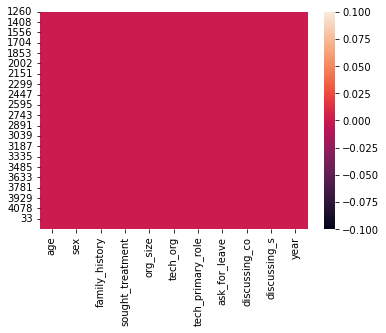

In [260]:
sns.heatmap(surveys.isnull())

In [261]:
print(surveys.shape)
surveys = surveys.dropna()
surveys.shape

(3107, 11)


(3107, 11)

In [262]:
surveys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3107 entries, 1260 to 179
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                3107 non-null   int64 
 1   sex                3107 non-null   object
 2   family_history     3107 non-null   object
 3   sought_treatment   3107 non-null   object
 4   org_size           3107 non-null   object
 5   tech_org           3107 non-null   object
 6   tech_primary_role  3107 non-null   object
 7   ask_for_leave      3107 non-null   object
 8   discussing_co      3107 non-null   object
 9   discussing_s       3107 non-null   object
 10  year               3107 non-null   object
dtypes: int64(1), object(10)
memory usage: 291.3+ KB


In [263]:
surveys['sought_treatment'] = surveys['sought_treatment'].astype(int)
surveys['tech_org'] = surveys['tech_org'].astype(int)
surveys['tech_primary_role'] = surveys['tech_primary_role'].astype(int)
surveys['year'] = surveys['year'].astype(int)


0    2606
1     501
Name: self_employed, dtype: int64

## Linear Regression

In [264]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


### Converting categorical features to numerical

In [265]:
lr_surveys = surveys

lr_surveys['sex'] = lr_surveys['sex'].map({'male':1,'female':0, 'other':2})
lr_surveys['family_history'] = lr_surveys['family_history'].map({'Yes':1,'No':0, "I don't know":2})
lr_surveys['org_size'] = lr_surveys['org_size'].map({
    'More than 1000':6,'500-1000':5, 
    '100-500':4, '26-100':3, '6-25':2, 
    '1-5':1, '-1':0})
lr_surveys['ask_for_leave'] = lr_surveys['ask_for_leave'].map({
    'Very difficult':7, 'Difficult':6,'Somewhat difficult':5, 
    'Neither easy nor difficult':4, 'Somewhat easy':3, 'Very easy':2, 
    "I don't know":1, '-1':0})
lr_surveys['discussing_co'] = lr_surveys['discussing_co'].map({'Yes':1,'No':0, "Maybe":2, '-1': 3})
lr_surveys['discussing_s'] = lr_surveys['discussing_s'].map({'Yes':1,'No':0, "Maybe":2, '-1': 3})
lr_surveys

,age,sex,family_history,sought_treatment,org_size,tech_org,tech_primary_role,ask_for_leave,discussing_co,discussing_s,year
1260,39,1,0,0,3,1,-1,2,2,1,2016
1261,29,1,1,1,2,1,-1,3,2,1,2016
1262,38,1,0,1,2,1,-1,4,2,2,2016
1263,43,1,0,1,0,-1,-1,0,3,3,2016
1264,43,0,1,1,2,0,1,4,2,0,2016
...,...,...,...,...,...,...,...,...,...,...,...
175,53,1,0,0,6,0,1,5,0,0,2020
176,23,0,0,0,3,1,1,2,2,2,2020
177,34,1,1,1,4,1,1,3,2,2,2020
178,43,1,1,1,5,0,1,6,2,0,2020


### Splitting data

In [267]:
independent_variables = [
    'age', 'sex', 'family_history', 'org_size', 
    'tech_org', 'tech_primary_role', 'ask_for_leave', 'discussing_co', 
    'discussing_s', 'year']
x = surveys[independent_variables]
y = surveys['sought_treatment']

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20, random_state=1)

lr_model = LogisticRegression(max_iter=200)

lr_model.fit(train_x, train_y)

predictions = lr_model.predict(test_x)

report = metrics.classification_report(test_y,predictions)
print(report)



              precision    recall  f1-score   support

           0       0.62      0.41      0.50       250
           1       0.68      0.83      0.75       372

    accuracy                           0.66       622
   macro avg       0.65      0.62      0.62       622
weighted avg       0.65      0.66      0.65       622



## Plots

## Gender

<AxesSubplot:xlabel='q2', ylabel='count'>

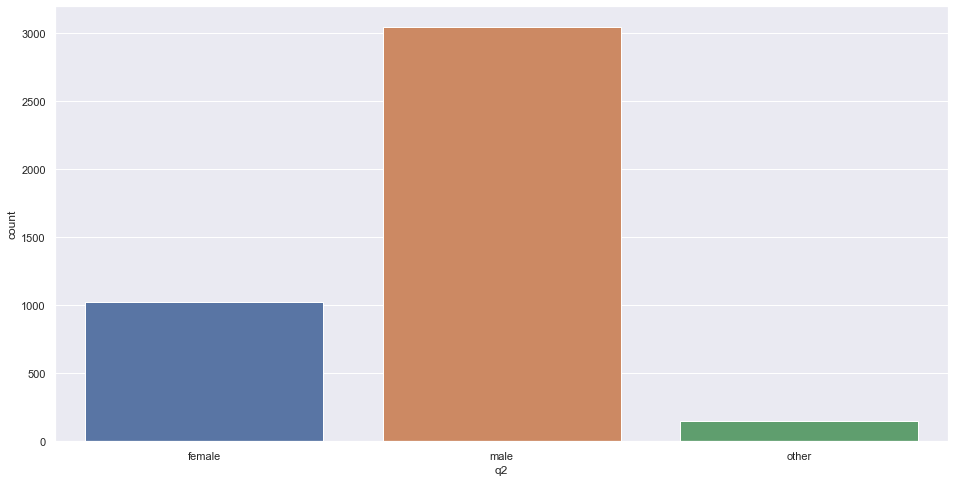

In [16]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.countplot(x='q2', data=surveys)

## Mental health disorder

<AxesSubplot:xlabel='q33', ylabel='count'>

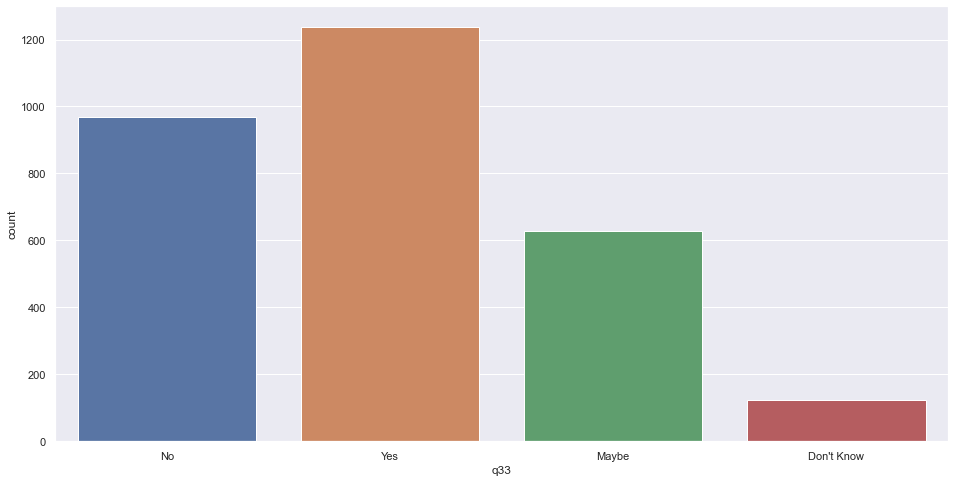

In [17]:
sns.countplot(x='q33', data=surveys)

## Mental health diagnoses

<AxesSubplot:xlabel='q34', ylabel='count'>

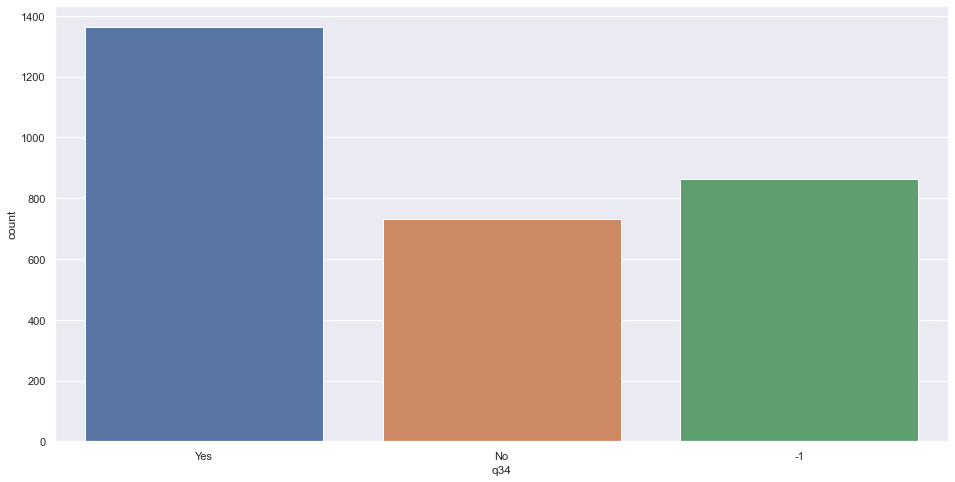

In [18]:
sns.countplot(x='q34', data=surveys)

## Company Size

<AxesSubplot:xlabel='q8', ylabel='count'>

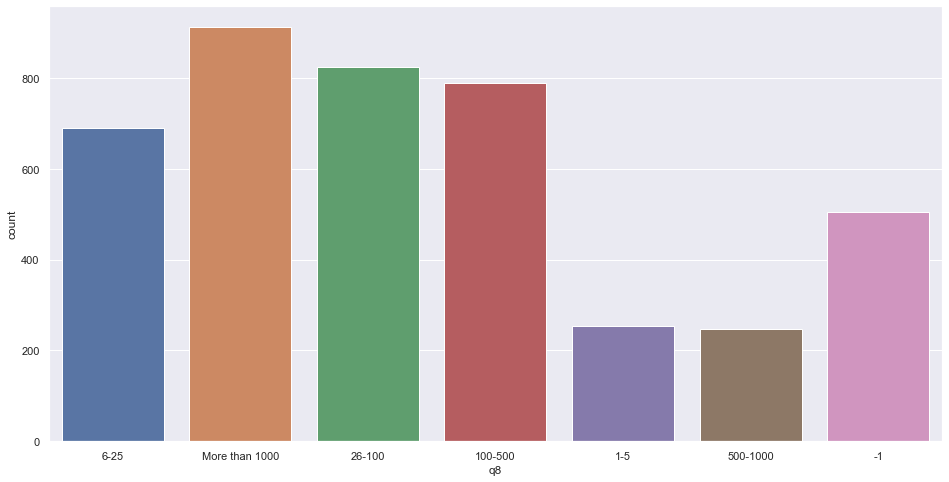

In [19]:
sns.countplot(x='q8', data=surveys)

## Self-employed

<AxesSubplot:xlabel='q5', ylabel='count'>

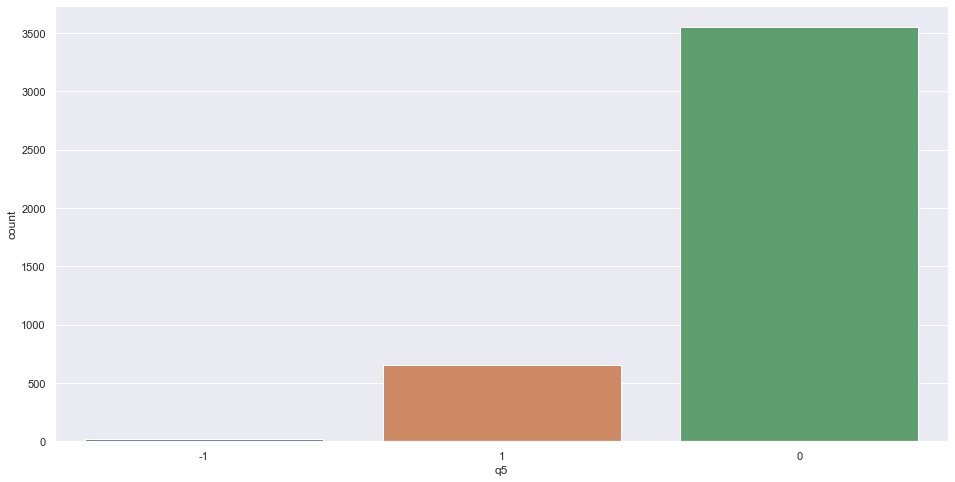

In [20]:
sns.countplot(x='q5', data=surveys)

## Family history of mental health

<AxesSubplot:xlabel='q6', ylabel='count'>

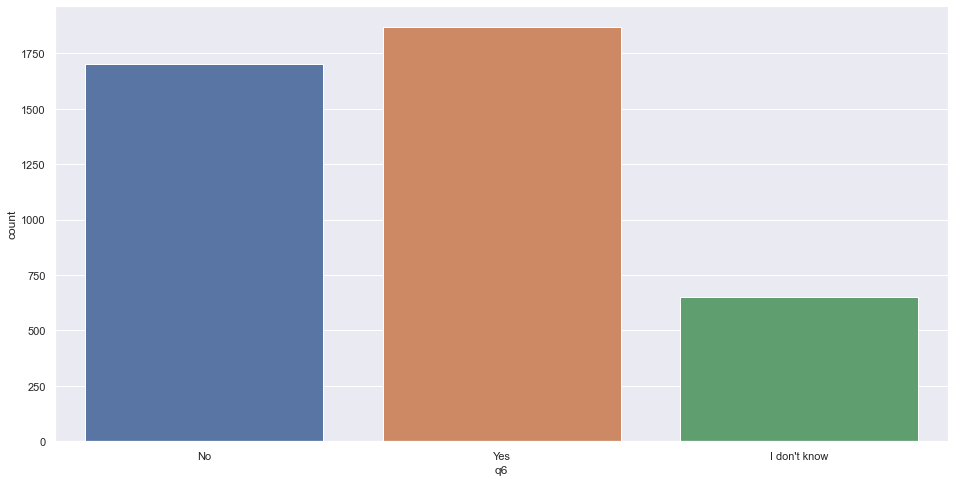

In [21]:
sns.countplot(x='q6', data=surveys)

## Tech company

<AxesSubplot:xlabel='q9', ylabel='count'>

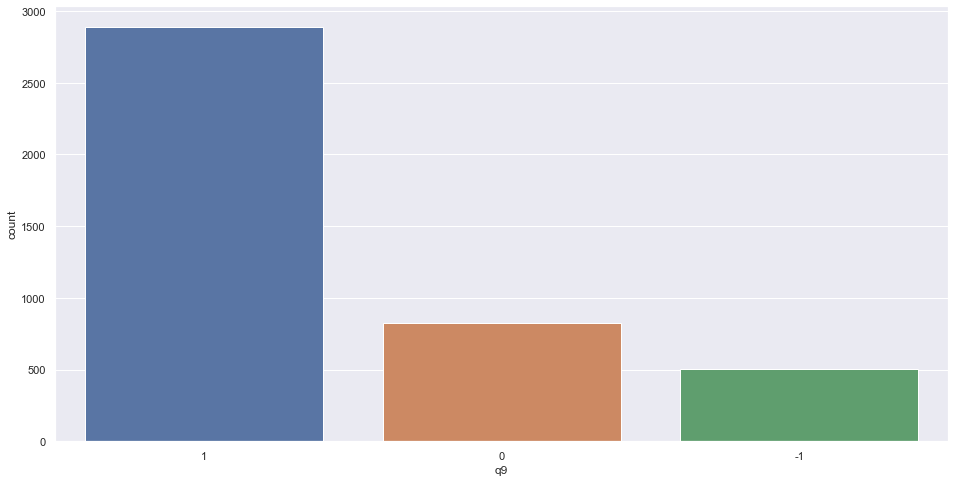

In [22]:
sns.countplot(x='q9', data=surveys)

## Tech role

<AxesSubplot:xlabel='q13', ylabel='count'>

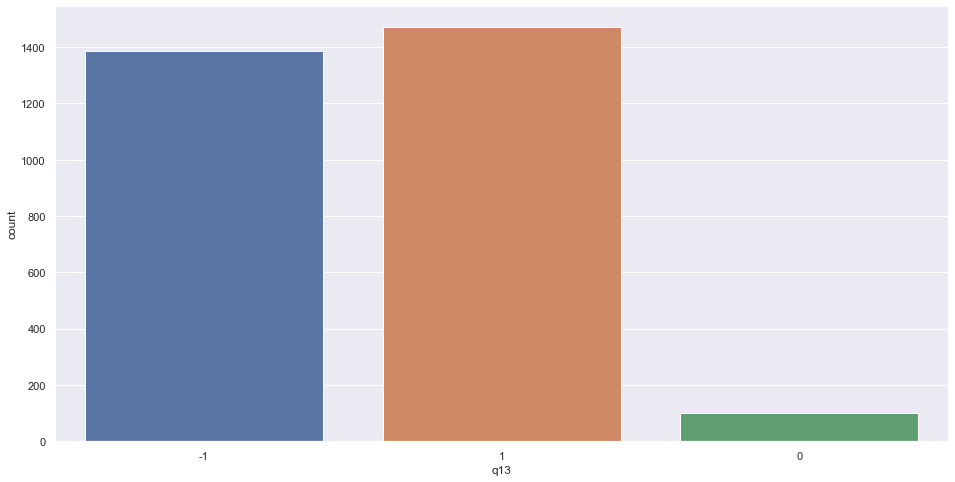

In [23]:
sns.countplot(x='q13', data=surveys)

## If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?

<AxesSubplot:xlabel='q17', ylabel='count'>

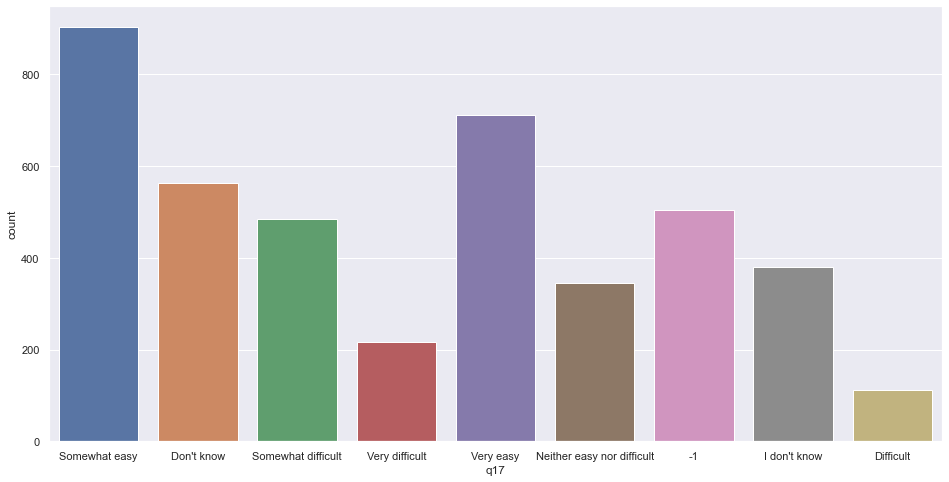

In [24]:
sns.countplot(x='q17', data=surveys)

## Would you feel comfortable discussing a mental health issue with your coworkers?
Att göra: Undersöka värdena för denna variabel.

<AxesSubplot:xlabel='q18', ylabel='count'>

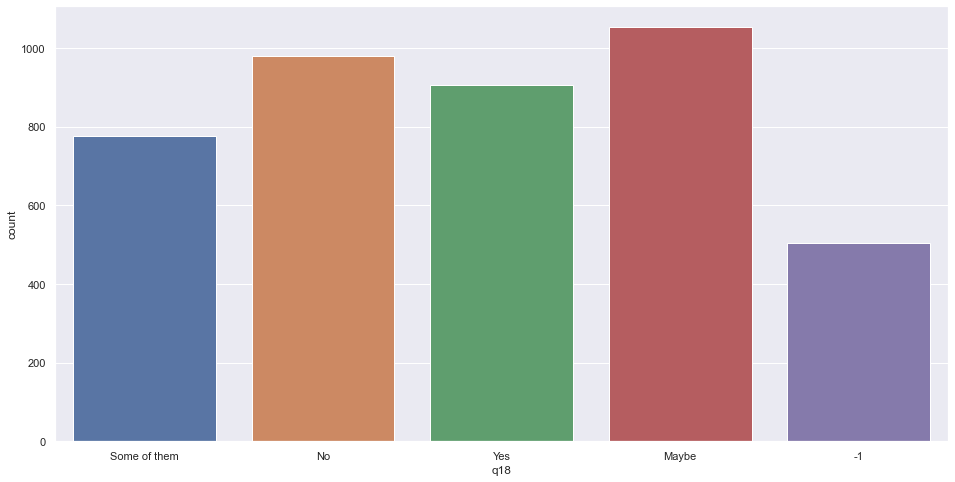

In [26]:
sns.countplot(x='q18', data=surveys)

## Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?
Att göra: Undersöka värdena för denna variabel.

<AxesSubplot:xlabel='q19', ylabel='count'>

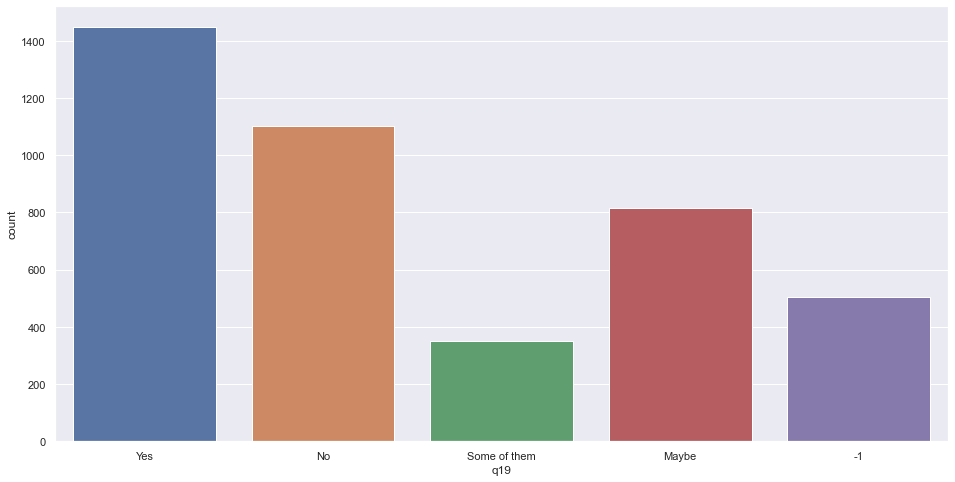

In [27]:
sns.countplot(x='q19', data=surveys)

## How willing would you be to share with friends and family that you have a mental illness?

<AxesSubplot:xlabel='q30', ylabel='count'>

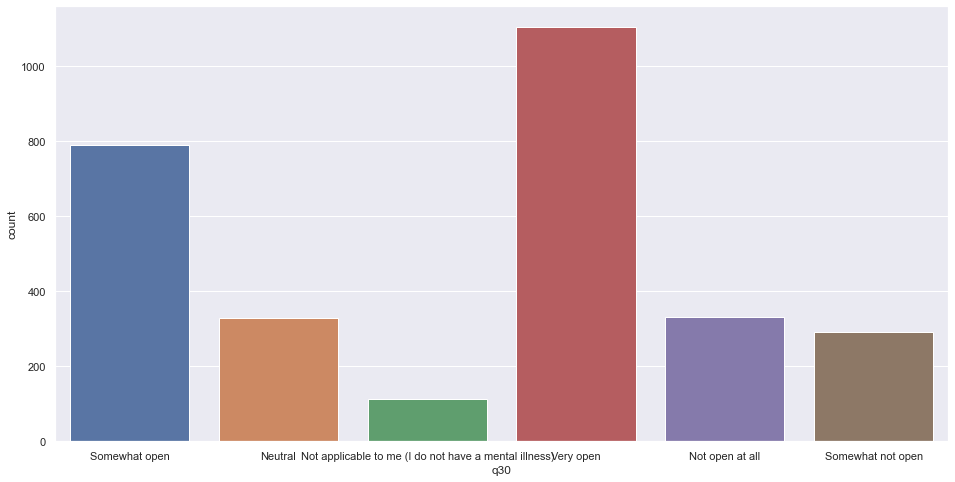

In [29]:
sns.countplot(x='q30', data=surveys)